In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv('C:/Users/87591/Desktop/processed/merged_data.csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 1]) 
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((1865, 10, 11), (467, 10, 11), (1865,), (467,))

In [5]:
data

,fear_index,bit price,Open,High,Low,BNB price,eth price,Year,Month,Day,Weekday
Date,,,,,,,,,,,
2024-06-30,47,62754.3,60973.1,63006.6,60703.7,582.30,3437.84,2024,6,30,6
2024-06-29,30,60973.4,60403.7,61192.8,60382.8,570.39,3378.60,2024,6,29,5
2024-06-28,47,60403.3,61684.6,62175.4,60081.9,567.31,3380.15,2024,6,28,4
2024-06-27,40,61685.3,60848.3,62351.2,60629.4,581.70,3450.45,2024,6,27,3
2024-06-26,46,60849.4,61809.9,62469.4,60715.1,573.08,3370.72,2024,6,26,2
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-05,11,6938.5,8220.8,8383.2,6651.9,6.70,696.86,2018,2,5,0
2018-02-04,24,8222.2,9241.5,9382.1,7932.1,8.40,829.43,2018,2,4,6
2018-02-03,40,9241.1,8894.4,9506.9,8249.3,9.75,971.49,2018,2,3,5


Epoch 1/20


C:\Users\87591\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


936/936 - 1s - 2ms/step - loss: 0.0018
Epoch 2/20
936/936 - 1s - 536us/step - loss: 1.0870e-04
Epoch 3/20
936/936 - 0s - 520us/step - loss: 9.8659e-05
Epoch 4/20
936/936 - 0s - 512us/step - loss: 1.3639e-04
Epoch 5/20
936/936 - 0s - 521us/step - loss: 7.0524e-05
Epoch 6/20
936/936 - 1s - 537us/step - loss: 7.7639e-05
Epoch 7/20
936/936 - 0s - 525us/step - loss: 7.7013e-05
Epoch 8/20
936/936 - 0s - 527us/step - loss: 6.4986e-05
Epoch 9/20
936/936 - 0s - 529us/step - loss: 4.2875e-05
Epoch 10/20
936/936 - 0s - 526us/step - loss: 3.6303e-05
Epoch 11/20
936/936 - 0s - 521us/step - loss: 3.9646e-05
Epoch 12/20
936/936 - 0s - 524us/step - loss: 5.4050e-05
Epoch 13/20
936/936 - 1s - 536us/step - loss: 2.1322e-05
Epoch 14/20
936/936 - 1s - 543us/step - loss: 2.3683e-05
Epoch 15/20
936/936 - 1s - 544us/step - loss: 5.0230e-05
Epoch 16/20
936/936 - 0s - 526us/step - loss: 1.9105e-05
Epoch 17/20
936/936 - 1s - 554us/step - loss: 3.1210e-05
Epoch 18/20
936/936 - 1s - 599us/step - loss: 3.1489e-05


C:\Users\87591\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


936/936 - 2s - 2ms/step - loss: 0.0018
Epoch 2/20
936/936 - 1s - 616us/step - loss: 2.0707e-04
Epoch 3/20
936/936 - 1s - 618us/step - loss: 1.2543e-04
Epoch 4/20
936/936 - 1s - 602us/step - loss: 8.2614e-05
Epoch 5/20
936/936 - 1s - 578us/step - loss: 8.5265e-05
Epoch 6/20
936/936 - 1s - 596us/step - loss: 8.7044e-05
Epoch 7/20
936/936 - 1s - 588us/step - loss: 8.0199e-05
Epoch 8/20
936/936 - 1s - 609us/step - loss: 6.9383e-05
Epoch 9/20
936/936 - 1s - 574us/step - loss: 6.1015e-05
Epoch 10/20
936/936 - 1s - 585us/step - loss: 2.4990e-05
Epoch 11/20
936/936 - 1s - 598us/step - loss: 5.2254e-05
Epoch 12/20
936/936 - 1s - 603us/step - loss: 3.1434e-05
Epoch 13/20
936/936 - 1s - 609us/step - loss: 3.7366e-05
Epoch 14/20
936/936 - 1s - 586us/step - loss: 1.0954e-04
Epoch 15/20
936/936 - 1s - 632us/step - loss: 1.7377e-05
Epoch 16/20
936/936 - 1s - 633us/step - loss: 3.5517e-05
Epoch 17/20
936/936 - 1s - 619us/step - loss: 4.0869e-05
Epoch 18/20
936/936 - 1s - 693us/step - loss: 3.7559e-05


C:\Users\87591\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


936/936 - 2s - 2ms/step - loss: 0.0034
Epoch 2/20
936/936 - 1s - 633us/step - loss: 1.1458e-04
Epoch 3/20
936/936 - 1s - 657us/step - loss: 8.5850e-05
Epoch 4/20
936/936 - 1s - 637us/step - loss: 6.9271e-05
Epoch 5/20
936/936 - 1s - 625us/step - loss: 8.9686e-05
Epoch 6/20
936/936 - 1s - 653us/step - loss: 6.1838e-05
Epoch 7/20
936/936 - 1s - 649us/step - loss: 6.7053e-05
Epoch 8/20
936/936 - 1s - 632us/step - loss: 6.0670e-05
Epoch 9/20
936/936 - 1s - 657us/step - loss: 4.9576e-05
Epoch 10/20
936/936 - 1s - 633us/step - loss: 5.5758e-05
Epoch 11/20
936/936 - 1s - 664us/step - loss: 5.1916e-05
Epoch 12/20
936/936 - 1s - 636us/step - loss: 3.7581e-05
Epoch 13/20
936/936 - 1s - 624us/step - loss: 3.2135e-05
Epoch 14/20
936/936 - 1s - 668us/step - loss: 3.4342e-05
Epoch 15/20
936/936 - 1s - 636us/step - loss: 3.5354e-05
Epoch 16/20
936/936 - 1s - 648us/step - loss: 2.9482e-05
Epoch 17/20
936/936 - 1s - 641us/step - loss: 3.2740e-05
Epoch 18/20
936/936 - 1s - 638us/step - loss: 3.1932e-05


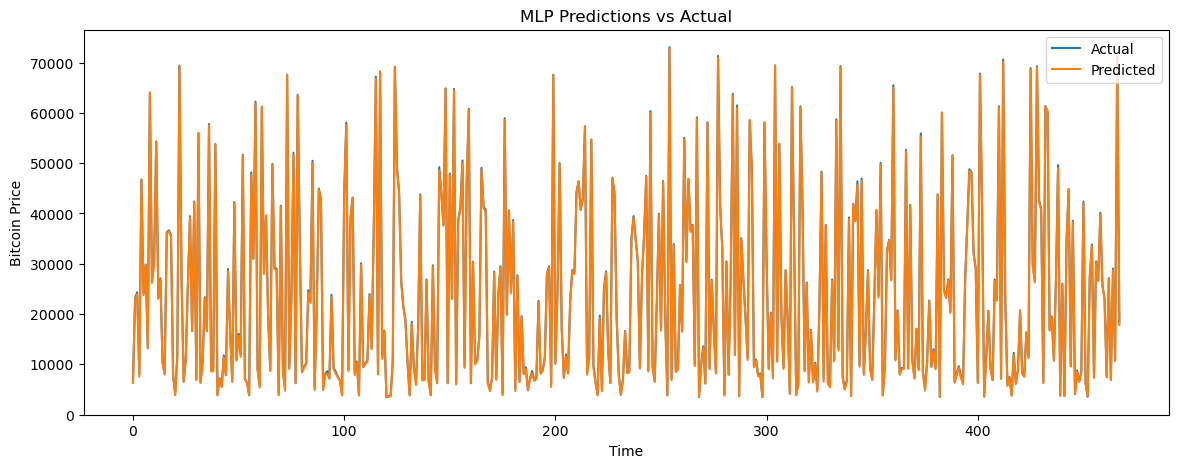

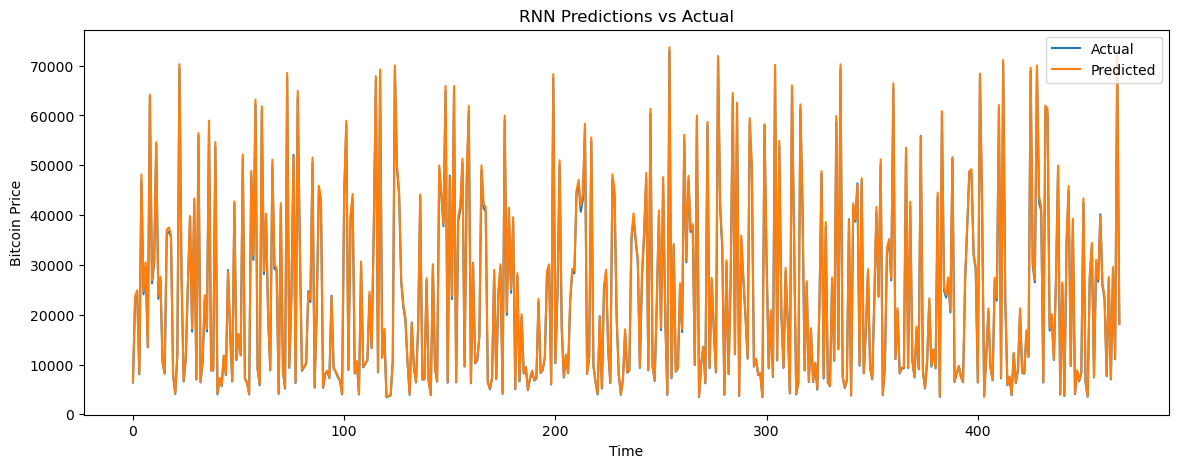

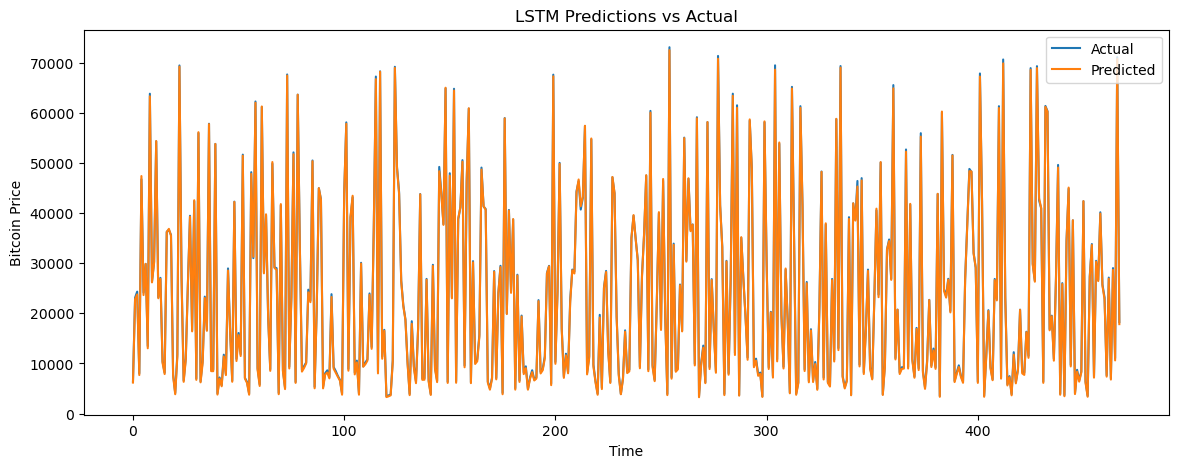

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import warnings

data = pd.read_csv('C:/Users/87591/Desktop/processed/merged_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 2])  
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(scaled_data, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train.shape[2] * look_back, activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1))
mlp_model.compile(loss='mean_squared_error', optimizer='adam')
mlp_model.fit(X_train.reshape(X_train.shape[0], -1), y_train, epochs=20, batch_size=2, verbose=2)

y_pred_mlp = mlp_model.predict(X_test.reshape(X_test.shape[0], -1))

def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    cvrmse = rmse / np.mean(y_true) * 100
    return r2, mae, rmse, mape, cvrmse

metrics_mlp = calculate_metrics(y_test, y_pred_mlp)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)

y_pred_rnn = rnn_model.predict(X_test)

metrics_rnn = calculate_metrics(y_test, y_pred_rnn)

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)

y_pred_lstm = lstm_model.predict(X_test)

metrics_lstm = calculate_metrics(y_test, y_pred_lstm)

results = pd.DataFrame({
    'Model': ['MLP', 'RNN', 'LSTM'],
    'R²': [metrics_mlp[0], metrics_rnn[0], metrics_lstm[0]],
    'MAE': [metrics_mlp[1], metrics_rnn[1], metrics_lstm[1]],
    'RMSE': [metrics_mlp[2], metrics_rnn[2], metrics_lstm[2]],
    'MAPE': [metrics_mlp[3], metrics_rnn[3], metrics_lstm[3]],
    'CVRMSE': [metrics_mlp[4], metrics_rnn[4], metrics_lstm[4]]
})

print(results)

# Function to inverse transform the scaled data
def inverse_transform(y_scaled, X_test, scaler, target_index):
    inverse_scaled = np.concatenate((X_test[:, 0, :target_index], y_scaled, X_test[:, 0, target_index+1:]), axis=1)
    return scaler.inverse_transform(inverse_scaled)[:, target_index]

# Inverse transform the test and prediction data
y_test_inverse = inverse_transform(y_test.reshape(-1, 1), X_test, scaler, 2)
y_pred_mlp_inverse = inverse_transform(y_pred_mlp, X_test, scaler, 2)
y_pred_rnn_inverse = inverse_transform(y_pred_rnn, X_test, scaler, 2)
y_pred_lstm_inverse = inverse_transform(y_pred_lstm, X_test, scaler, 2)

# Plotting MLP predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='Actual')
plt.plot(y_pred_mlp_inverse, label='Predicted')
plt.title('MLP Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

# Plotting RNN predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='Actual')
plt.plot(y_pred_rnn_inverse, label='Predicted')
plt.title('RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

# Plotting LSTM predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='Actual')
plt.plot(y_pred_lstm_inverse, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [24]:
# Manually calculating the split index
split_index = int(len(data) * 0.8)

# Retrieve date ranges for training and testing sets
train_date_range = (data.index[0], data.index[split_index - 1])
test_date_range = (data.index[split_index], data.index[-1])

train_date_range, test_date_range


((Timestamp('2018-02-01 00:00:00'), Timestamp('2023-03-19 00:00:00')),
 (Timestamp('2023-03-20 00:00:00'), Timestamp('2024-06-30 00:00:00')))

Epoch 1/20
936/936 - 1s - 1ms/step - loss: 6.3958e-04
Epoch 2/20
936/936 - 0s - 504us/step - loss: 1.4765e-04
Epoch 3/20
936/936 - 0s - 508us/step - loss: 1.1999e-04
Epoch 4/20
936/936 - 0s - 499us/step - loss: 1.0468e-04
Epoch 5/20
936/936 - 0s - 508us/step - loss: 1.0330e-04
Epoch 6/20
936/936 - 0s - 493us/step - loss: 6.6600e-05
Epoch 7/20
936/936 - 0s - 501us/step - loss: 5.6745e-05
Epoch 8/20
936/936 - 0s - 514us/step - loss: 4.7544e-05
Epoch 9/20
936/936 - 0s - 515us/step - loss: 1.0274e-04
Epoch 10/20
936/936 - 0s - 529us/step - loss: 5.9553e-05
Epoch 11/20
936/936 - 0s - 512us/step - loss: 5.2769e-05
Epoch 12/20
936/936 - 0s - 525us/step - loss: 6.3772e-05
Epoch 13/20
936/936 - 0s - 514us/step - loss: 4.0530e-05
Epoch 14/20
936/936 - 0s - 499us/step - loss: 5.1566e-05
Epoch 15/20
936/936 - 0s - 508us/step - loss: 4.5305e-05
Epoch 16/20
936/936 - 0s - 511us/step - loss: 5.4000e-05
Epoch 17/20
936/936 - 0s - 511us/step - loss: 3.6050e-05
Epoch 18/20
936/936 - 0s - 511us/step - lo

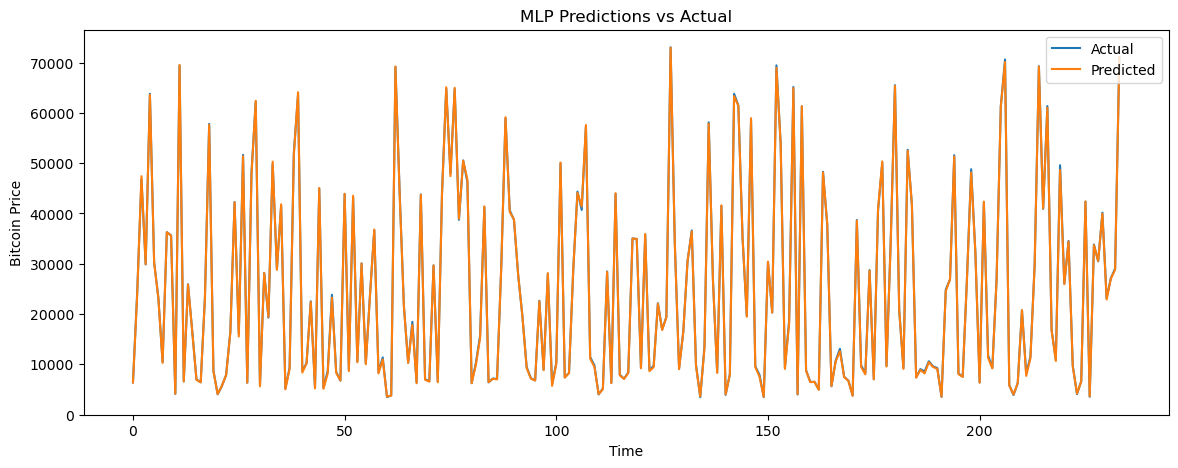

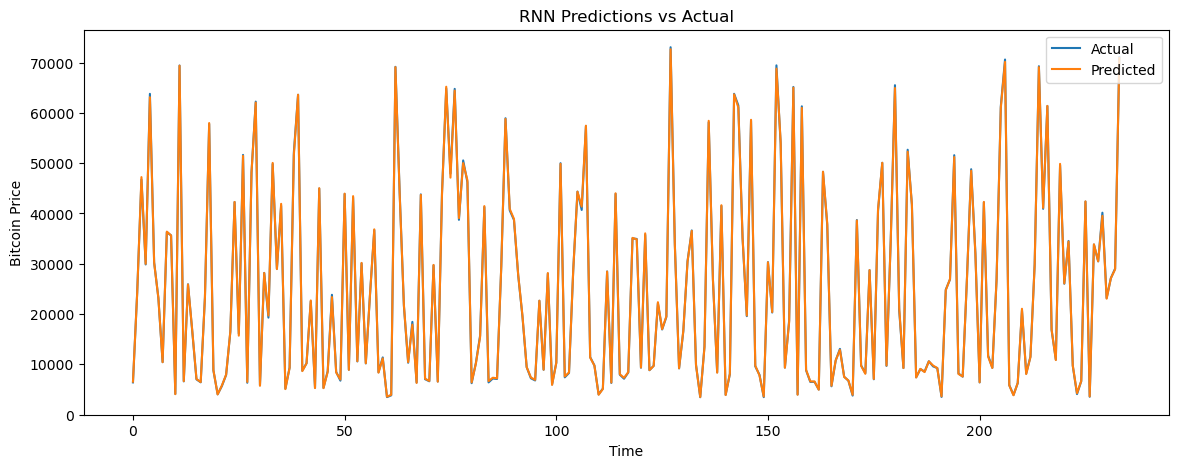

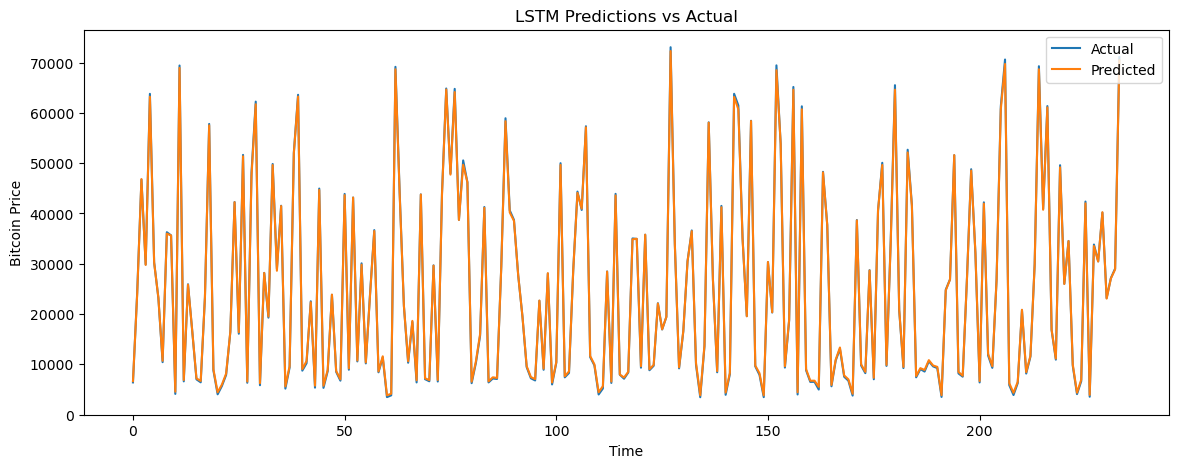

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import warnings

data = pd.read_csv('C:/Users/87591/Desktop/processed/merged_data.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 2])  
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(scaled_data, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train.shape[2] * look_back, activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1))
mlp_model.compile(loss='mean_squared_error', optimizer='adam')
mlp_model.fit(X_train.reshape(X_train.shape[0], -1), y_train, epochs=20, batch_size=2, verbose=2)

y_pred_mlp = mlp_model.predict(X_test.reshape(X_test.shape[0], -1))

def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    cvrmse = rmse / np.mean(y_true) * 100
    return r2, mae, rmse, mape, cvrmse

metrics_mlp = calculate_metrics(y_test, y_pred_mlp)

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)

y_pred_rnn = rnn_model.predict(X_test)

metrics_rnn = calculate_metrics(y_test, y_pred_rnn)

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)

y_pred_lstm = lstm_model.predict(X_test)

metrics_lstm = calculate_metrics(y_test, y_pred_lstm)

results = pd.DataFrame({
    'Model': ['MLP', 'RNN', 'LSTM'],
    'R²': [metrics_mlp[0], metrics_rnn[0], metrics_lstm[0]],
    'MAE': [metrics_mlp[1], metrics_rnn[1], metrics_lstm[1]],
    'RMSE': [metrics_mlp[2], metrics_rnn[2], metrics_lstm[2]],
    'MAPE': [metrics_mlp[3], metrics_rnn[3], metrics_lstm[3]],
    'CVRMSE': [metrics_mlp[4], metrics_rnn[4], metrics_lstm[4]]
})

print(results)

# Function to inverse transform the scaled data
def inverse_transform(y_scaled, X_test, scaler, target_index):
    inverse_scaled = np.concatenate((X_test[:, 0, :target_index], y_scaled, X_test[:, 0, target_index+1:]), axis=1)
    return scaler.inverse_transform(inverse_scaled)[:, target_index]

# Inverse transform the test and prediction data
y_test_inverse = inverse_transform(y_test.reshape(-1, 1), X_test, scaler, 2)
y_pred_mlp_inverse = inverse_transform(y_pred_mlp, X_test, scaler, 2)
y_pred_rnn_inverse = inverse_transform(y_pred_rnn, X_test, scaler, 2)
y_pred_lstm_inverse = inverse_transform(y_pred_lstm, X_test, scaler, 2)

# Down-sampling rate
n = 2  # Plot every nth point

# Plotting MLP predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse[::n], label='Actual')
plt.plot(y_pred_mlp_inverse[::n], label='Predicted')
plt.title('MLP Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

# Plotting RNN predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse[::n], label='Actual')
plt.plot(y_pred_rnn_inverse[::n], label='Predicted')
plt.title('RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

# Plotting LSTM predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse[::n], label='Actual')
plt.plot(y_pred_lstm_inverse[::n], label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


In [37]:
pip install keras-tuner


   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


LSTM

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 60, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0321 - val_loss: 0.0013
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019 - val_loss: 8.7012e-04
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss:

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
MAE: 2037.3876948851207
RMSE: 2714.280737851592
R2: 0.9695483189846602
MAPE: 4.499235113535218
CVRMSE: 6.556261215371431


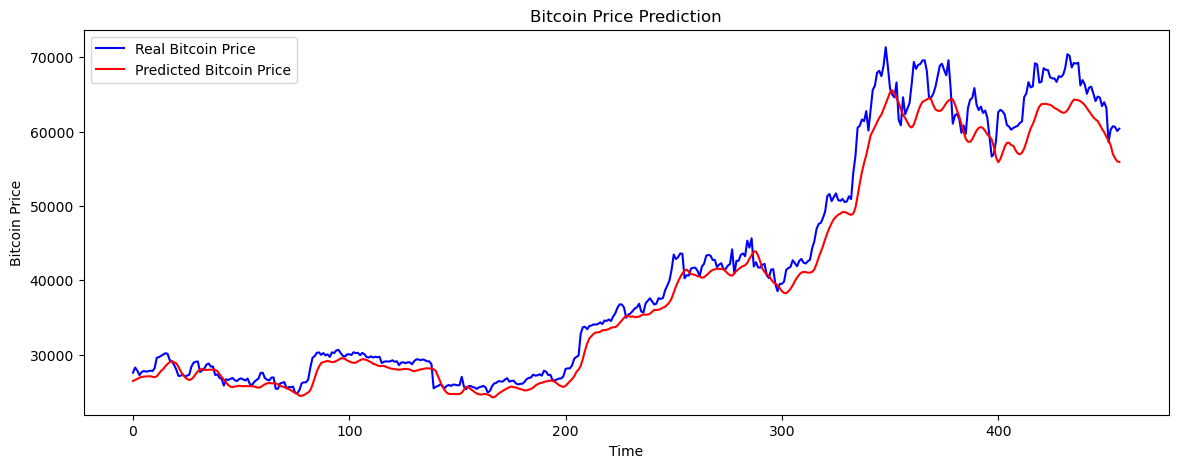

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3D shape data is required to construct LSTM models
X_train = X_train.reshape(X_train.shape[0], time_step, X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], time_step, X_test.shape[2])

# Constructing the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilation model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('lstm_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 60, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - val_loss: 0.0052
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0066 - val_loss: 0.0086
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - val_loss: 0.0104
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045 - val_loss: 0.0183
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - val_loss: 0.0193
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - val_loss: 0.0121
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034 - val_loss: 0.0304
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034 - val_loss: 0.0140
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032 - val_loss: 0.0169
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0031 - val_loss: 0.0177
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027 - val_loss: 0.0169
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
MAE: 323.5582822009197
RMSE: 530.6913332515378
R2: 0.45925896656089593
MAPE: 11.547556888321063
CVRMSE: 22.38681250168486


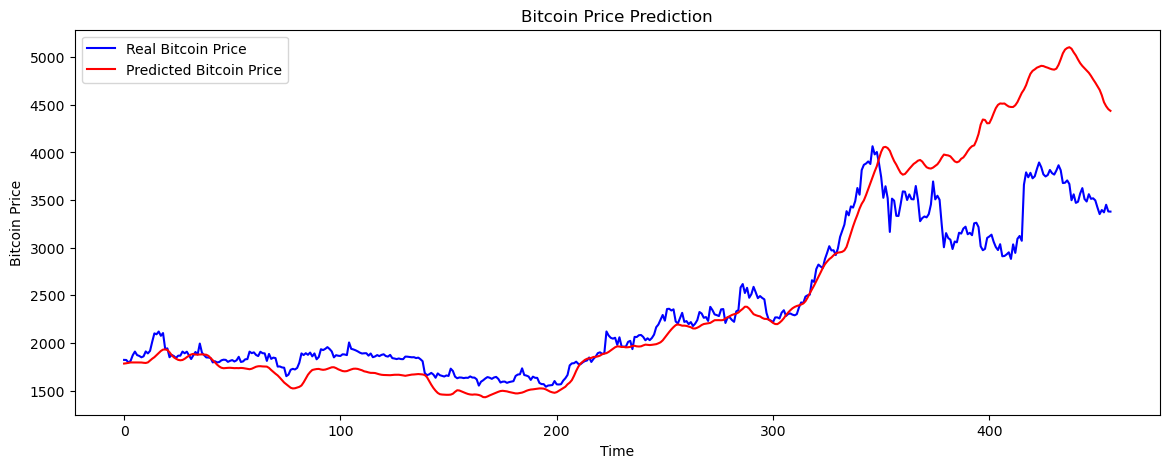

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3D shape data is required to construct LSTM models
X_train = X_train.reshape(X_train.shape[0], time_step, X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], time_step, X_test.shape[2])

# Constructing the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilation model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('lstm_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


Trial 10 Complete [00h 01m 41s]
val_loss: 0.004632331896573305

Best val_loss So Far: 0.004632331896573305
Total elapsed time: 00h 17m 39s
Best units: 160
Best dropout rate: 0.4
Best optimizer: rmsprop
Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0269 - val_loss: 0.0079
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0074 - val_loss: 0.0077
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0067 - val_loss: 0.0049
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0060 - val_loss: 0.0064
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0061 - val_loss: 0.0080
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0064 - val_loss: 0.0071
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0058 - val_loss: 0.0180
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
MAE: 413.04759534839985
RMSE: 532.8142817231472
R2: 0.454924011730533
MAPE: 16.26305790270296
CVRMSE: 22.476367477255064


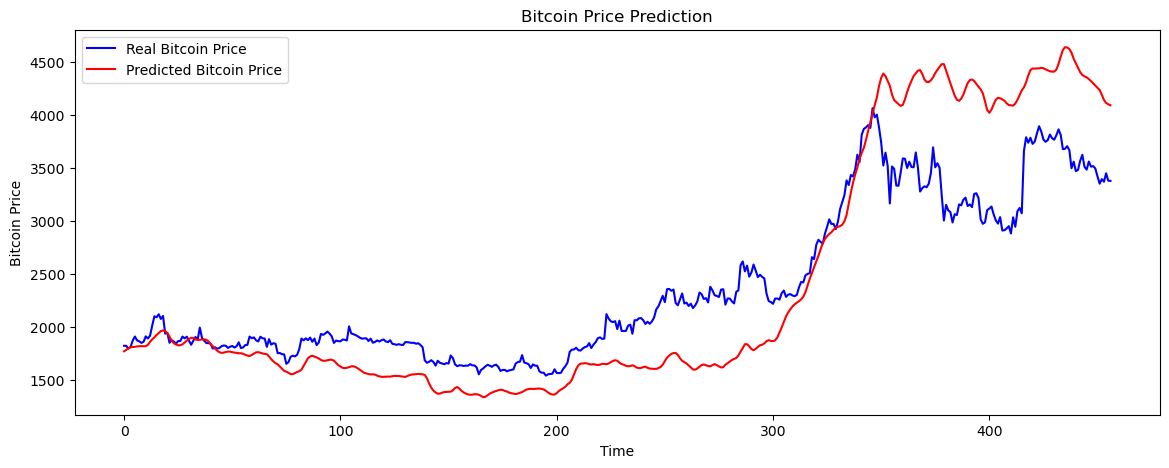

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras_tuner as kt

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3D shape data is required to construct LSTM models
X_train = X_train.reshape(X_train.shape[0], time_step, X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], time_step, X_test.shape[2])

# Constructing the LSTM model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=True, input_shape=(time_step, X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Hyperparameter search with Keras Tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='lstm_tuner',
                        project_name='bitcoin_lstm')

# Run hyperparameter searches
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout rate: {best_hps.get('dropout_rate')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")

# Train the model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('best_lstm_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


RNN

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_18 (SimpleRNN)            │ (None, 60, 50)              │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2299 - val_loss: 0.0117
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0501 - val_loss: 0.0057
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0291 - val_loss: 0.0013
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185 - val_loss: 0.0022
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0150 - val_loss: 7.6100e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0122 - val_loss: 5.1306e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078 - val_loss: 6.1016e-04
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0077 - val_loss: 0.0014
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - val_loss: 3.8816e-04
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0063 - val_loss: 3.5193e-04
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 4.1764e-04
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/st

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MAE: 1398.195953569475
RMSE: 1970.8067734197507
R2: 0.9839457569012873
MAPE: 2.915384703712387
CVRMSE: 4.760422837392477


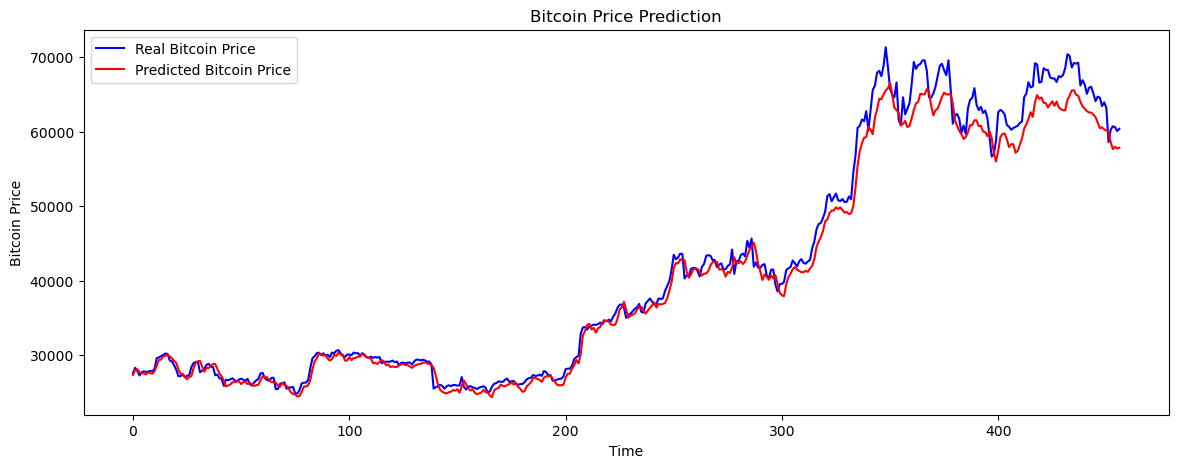

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Constructing the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilation model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('rnn_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)            │ (None, 60, 50)              │           2,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_21 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,951 (31.06 KB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3087 - val_loss: 0.0079
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0856 - val_loss: 0.0098
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0498 - val_loss: 0.0138
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0338 - val_loss: 0.0199
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0263 - val_loss: 0.0070
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0218 - val_loss: 0.0075
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0170 - val_loss: 0.0145
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0156 - val_loss: 0.0086
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0142 - val_loss: 0.0081
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0123 - val_loss: 0.0050
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0099 - 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAE: 339.88183229408844
RMSE: 410.10519730760984
R2: 0.6770793019100584
MAPE: 14.048070589410289
CVRMSE: 17.299977562927975


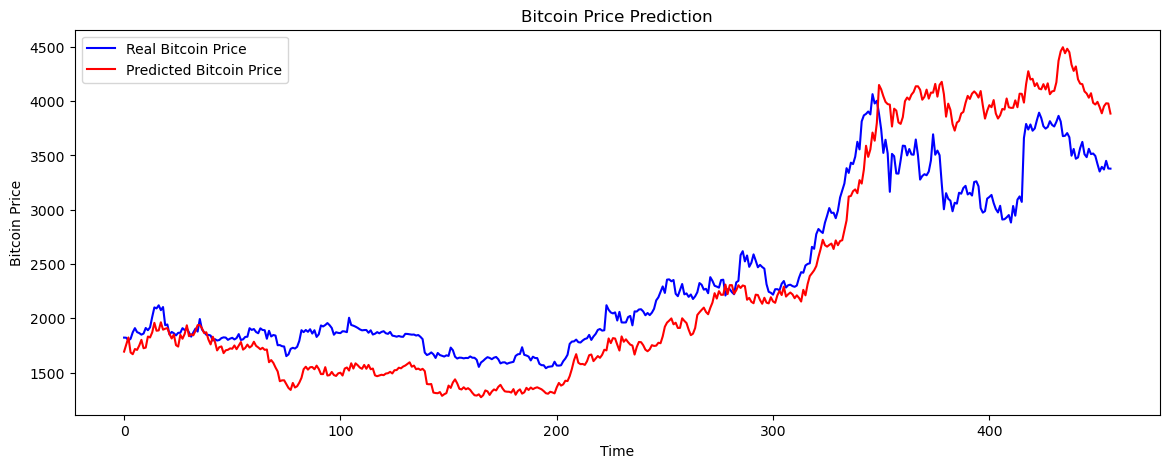

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Constructing the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilation model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('rnn_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


Trial 10 Complete [00h 00m 32s]
val_loss: 0.004330637282691896

Best val_loss So Far: 0.002731714630499482
Total elapsed time: 00h 05m 53s
Best units: 32
Best dropout rate: 0.30000000000000004
Best optimizer: rmsprop
Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2346 - val_loss: 0.0088
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0788 - val_loss: 0.0058
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0320 - val_loss: 0.0081
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0219 - val_loss: 0.0086
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0129 - val_loss: 0.0076
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - val_loss: 0.0040
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0107 - val_loss: 0.0043
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0100 - val_loss: 0.0039
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0080 - val_loss: 0.0031
Epoch 10/50
57/57 ━━━━

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAE: 287.67300604955886
RMSE: 328.0634048245804
R2: 0.7933568981951198
MAPE: 12.865751128169537
CVRMSE: 13.839106599826758


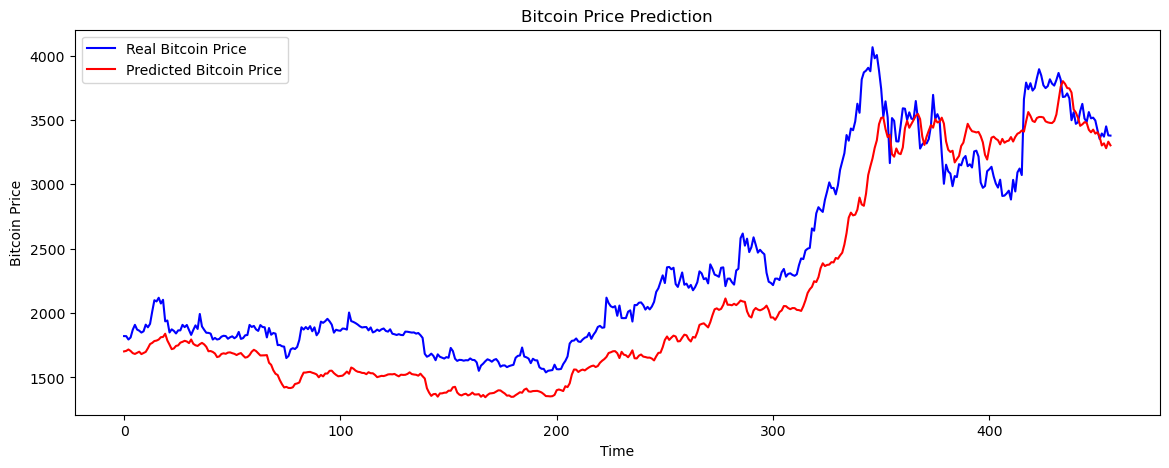

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import keras_tuner as kt

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3D shape data is required to construct RNN models
X_train = X_train.reshape(X_train.shape[0], time_step, X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], time_step, X_test.shape[2])

# Constructing the RNN model
def build_model(hp):
    model = Sequential()
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                        return_sequences=True, input_shape=(time_step, X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                        return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Hyperparameter search with Keras Tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='rnn_tuner',
                        project_name='bitcoin_rnn')

# Run hyperparameter searches
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout rate: {best_hps.get('dropout_rate')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")

# Train the model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('best_rnn_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


MLP

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 128)                 │          30,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,169 (153.00 KB)

 Trainable params: 39,169 (153.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0822 - val_loss: 0.0125
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0096 - val_loss: 0.0313
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - val_loss: 0.0161
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0088
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0204
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0145
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0133
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0082
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0094
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0165
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_lo

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 7731.607037233315
RMSE: 8885.001578215053
R2: 0.673700234973295
MAPE: 17.729767879385648
CVRMSE: 21.461446648983422


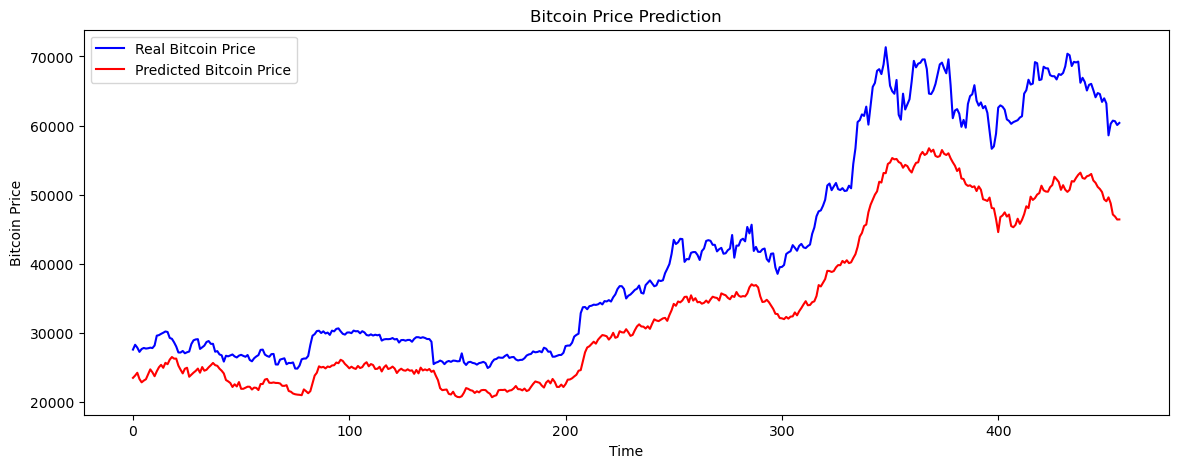

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# MLP expects 2D array for input, so reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Constructing the MLP model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilation model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('mlp_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 128)                 │          46,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,529 (213.00 KB)

 Trainable params: 54,529 (213.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0438 - val_loss: 0.0135
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - val_loss: 0.0275
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - val_loss: 0.0064
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0084
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - val_loss: 0.0155
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0079
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - val_loss: 0.0096
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0119
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_lo

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 727.3892152348025
RMSE: 818.0934426293055
R2: -0.2850237650997025
MAPE: 32.7565285344695
CVRMSE: 34.51065310749932


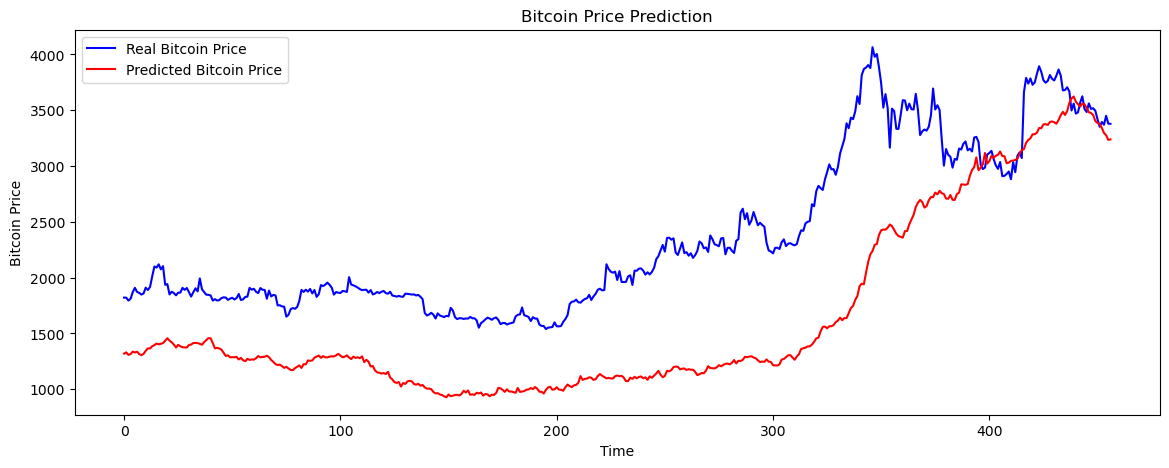

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# MLP expects 2D array for input, so reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Constructing the MLP model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilation model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('mlp_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

Trial 10 Complete [00h 00m 12s]
val_loss: 0.004645226057618856

Best val_loss So Far: 0.004645226057618856
Total elapsed time: 00h 02m 01s
Best units for first dense layer: 512
Best dropout rate for first layer: 0.1
Best units for second dense layer: 224
Best dropout rate for second layer: 0.30000000000000004
Best optimizer: rmsprop
Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1699 - val_loss: 0.0075
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - val_loss: 0.0058
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_loss: 0.0103
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098 - val_loss: 0.0297
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - val_loss: 0.0104
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0131
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 431.9174654677242
RMSE: 556.7193809160508
R2: 0.4049163510189635
MAPE: 16.716763250124085
CVRMSE: 23.48478600594442


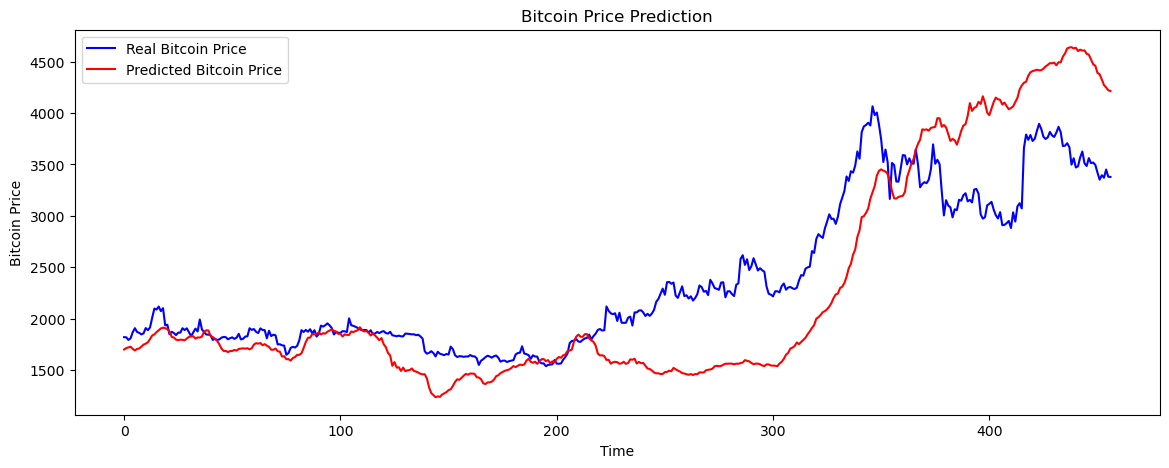

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt

# loading data
file_path = 'C:/Users/87591/Desktop/processed/merged_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
features = data[['fear_index', 'bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]

# Data normalisation
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Creating Time Series Data
def create_time_series(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_time_series(scaled_features, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# MLP expects 2D array for input, so reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Constructing the MLP mode
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Hyperparameter search with Keras Tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='mlp_tuner',
                        project_name='bitcoin_mlp')

# Run hyperparameter searches
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best units for first dense layer: {best_hps.get('units_1')}")
print(f"Best dropout rate for first layer: {best_hps.get('dropout_rate_1')}")
print(f"Best units for second dense layer: {best_hps.get('units_2')}")
print(f"Best dropout rate for second layer: {best_hps.get('dropout_rate_2')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")

# Train the model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('best_mlp_bitcoin_model.h5')

# Predictions on the test set
predicted_bitcoin_price = model.predict(X_test)

# Inverse normalization
inverse_scaler = MinMaxScaler()
inverse_scaler.min_, inverse_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predicted_bitcoin_price = inverse_scaler.inverse_transform(predicted_bitcoin_price)
real_bitcoin_price = inverse_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculation of quality metrics
mae = mean_absolute_error(real_bitcoin_price, predicted_bitcoin_price)
rmse = np.sqrt(mean_squared_error(real_bitcoin_price, predicted_bitcoin_price))
r2 = r2_score(real_bitcoin_price, predicted_bitcoin_price)
mape = np.mean(np.abs((real_bitcoin_price - predicted_bitcoin_price) / real_bitcoin_price)) * 100
cvrmse = rmse / np.mean(real_bitcoin_price) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")
print(f"CVRMSE: {cvrmse}")

# Plotting line graphs of true and predicted values
plt.figure(figsize=(14, 5))
plt.plot(real_bitcoin_price, color='blue', label='Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()
